In [26]:
from json import load

from matplotlib import pyplot as plt
import numpy as np
import networkx as nx
from networkx.algorithms import betweenness_centrality

In [5]:
with open("../data/wallet_complete_with_failed.json", "r") as file:
    data = load(file)

In [7]:
len(data)

3858

In [8]:
def build_graph_from_dict(data_dict):
    g = nx.DiGraph()
    for package, deps in data_dict.items():
        g.add_node(package)
        for dep in deps:
            g.add_edge(package, dep)
    return g

In [9]:
dep_graph = build_graph_from_dict(data)

In [10]:
dep_graph.number_of_edges()

9113

In [14]:
betw = betweenness_centrality(dep_graph)
betw = sorted(betw.items(), key=lambda x: x[1], reverse=True)
betw[:30]

[('npm', 0.0002938546032225839),
 ('idna-uts46-hx', 0.0002693681685064336),
 ('eth-lib', 0.0002624189403464192),
 ('eth-ens-namehash', 0.00024411129877185451),
 ('web3-utils', 0.00024064896698924247),
 ('web3', 0.00022246478643005334),
 ('servify', 0.00022202581393094035),
 ('request', 0.00021467222701901777),
 ('web3-eth', 0.00016571897736047828),
 ('web3-eth-ens', 0.0001631717564889897),
 ('express', 0.00010126259720273963),
 ('glob', 9.240753931183763e-05),
 ('jest-config', 8.13126370050397e-05),
 ('http-signature', 7.238739455759344e-05),
 ('update-notifier', 6.947314035744969e-05),
 ('react-scripts', 6.620987297831776e-05),
 ('@babel/core', 6.606376601295749e-05),
 ('jsdom', 6.505151329516264e-05),
 ('ethereumjs-util', 6.493169034290168e-05),
 ('es-abstract', 6.14437612381958e-05),
 ('jest-environment-jsdom', 5.9886248954218205e-05),
 ('got', 5.396394846473069e-05),
 ('npm-registry-fetch', 5.20485481124961e-05),
 ('readable-stream', 5.1805613840639556e-05),
 ('chalk', 5.1607980509

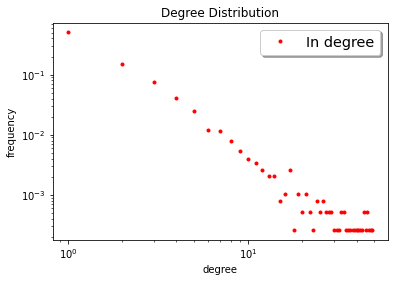

In [29]:
# in-degree of a package is the number of packages depend on it
in_degree_sequence = [degree for _, degree in dep_graph.in_degree()]
unique, counts = np.unique(in_degree_sequence, return_counts=True)
counts_map = np.asarray((unique, counts)).T
in_deg_dist = counts_map[:, 1] / np.sum(counts_map[:, 1])
_, ax = plt.subplots()
ax.loglog(in_deg_dist, 'r.', label='In degree')
ax.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.title('Degree Distribution')
plt.xlabel('degree')
plt.ylabel('frequency')
plt.show()
